## Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import resample
from sklearn.feature_selection import SelectFromModel 
from sklearn.model_selection import GridSearchCV 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor  
from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoo

# For plotting issues

In [2]:
acc = []; pre = [] ; rec = [] ; f = [] ; ro = []

# Reading the training dataset

In [3]:
# trainDataSet = pd.read_csv("https://github.com/leeje008/ML_final_project/blob/main/Loan_data/Loan_Train.csv")
trainDataSet = pd.read_csv("C:/Users/sangk/OneDrive/바탕 화면/ML_final_project-main/Loan_data/Loan_Train.csv")
trainDataSet.head()


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


## Scaling

In [4]:
# Standardization 평균 0 / 분산 1
scaler = StandardScaler()   



# 연속형 변수만 가져오기 only features
x_NewTrain = trainDataSet.loc[:, ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']]
scaler.fit(x_NewTrain)
x_NewTrain.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,3,13
1,7574516,40,10,9,13
2,3991815,66,4,4,10
3,6256451,41,2,2,12
4,5768871,47,11,3,14


In [5]:
# target variable 만 가져오기
y_NewTrain = trainDataSet.loc[:, ['Risk_Flag']]
y_NewTrain.head()

,Risk_Flag
0,0
1,0
2,0
3,1
4,1


In [6]:
# testDataset - features
x_Test = pd.read_csv("C:/Users/sangk/OneDrive/바탕 화면/ML_final_project-main/Loan_data/Loan_Test_feature.csv")

x_NewTest = x_Test.loc[:, ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']]
x_NewTest = scaler.transform(x_NewTest)


In [7]:
# testDataset - target
y_Test  = pd.read_csv("C:/Users/sangk/OneDrive/바탕 화면/ML_final_project-main/Loan_data/Loan_Test_target.csv")

y_NewTest = y_Test.loc[:,y_Test.columns !='id']
y_NewTest.head()


,risk_flag
0,0
1,0
2,1
3,0
4,0


# Explore the data and fill the empty fields (features)

C:\Users\sangk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

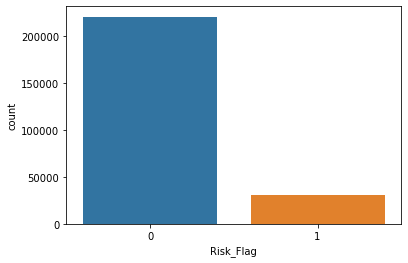

In [8]:
#checking target column 
sns.countplot(y_NewTrain['Risk_Flag'])

# Using Scikit-learn to do the predictions

### Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
import time

start = time.time()

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(x_NewTrain, y_NewTrain.values.ravel()) 

end = time.time()

print("The time of execution of above program is :", end-start)

The time of execution of above program is : 32.14825081825256


In [10]:
from sklearn.metrics import accuracy_score

y_pred_rf = rf.predict(x_NewTest)

# best_params.rf = rf.best_params_ #Determine which parameters used by the model
# print("By GridSearch, the best parameters are: ") 
# print(best_params)

#evaluaion 
Accuracy_rf = metrics.accuracy_score(y_NewTest, y_pred_rf)
Precision_rf = metrics.precision_score(y_NewTest , y_pred_rf)
Recall_rf = metrics.recall_score(y_NewTest , y_pred_rf)
F1_Score_rf = metrics.f1_score(y_NewTest , y_pred_rf)
Roc_rf = metrics.roc_auc_score(y_NewTest, y_pred_rf)

# print(" \nRandom Forest with best (criterion , Max feature , Max depth , Number of trees) ")
print ("Accuracy = " ,  Accuracy_rf )
print ("Precision = " , Precision_rf )
print ("Recall = " , Recall_rf )
print ("F1_Score = " , F1_Score_rf )
print ("ROC_Curve = " , Roc_rf)
print("The time of execution of above program is :", end-start)

ro.append(Roc_rf)
acc.append(Accuracy_rf)
pre.append(Precision_rf) 
rec.append(Recall_rf)
f.append(F1_Score_rf)

Accuracy =  0.1352857142857143
Precision =  0.12844631852092117
Recall =  0.9919287503478987
F1_Score =  0.22744097000638158
ROC_Curve =  0.5005532226357431
The time of execution of above program is : 32.14825081825256


### Random Forest with best (criterion , Max feature , Max depth , Number of trees)

In [218]:
#Random Forest with best (criterion , Max feature , Max depth , Number of trees)
#Determine the best using GridSearch
import time
start = time.time()

params_rf = [{'criterion': ['gini' , 'entropy'] ,
           'max_features': ['auto', 'log2'],
           'max_depth': [15, 25],
           'n_estimators': [100, 150] }]
clf_rf = GridSearchCV(estimator = RandomForestClassifier(),
                            param_grid = params_rf,
                            scoring = 'neg_mean_squared_error',verbose=2,cv=2)
                            
clf_rf.fit(x_NewTrain, y_NewTrain.values.ravel())  

end = time.time()

print("The time of execution of above program is :", end-start)


Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END criterion=gini, max_depth=15, max_features=auto, n_estimators=100; total time=   9.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, n_estimators=100; total time=   7.9s
[CV] END criterion=gini, max_depth=15, max_features=auto, n_estimators=150; total time=  14.1s
[CV] END criterion=gini, max_depth=15, max_features=auto, n_estimators=150; total time=  10.2s
[CV] END criterion=gini, max_depth=15, max_features=log2, n_estimators=100; total time=   9.0s
[CV] END criterion=gini, max_depth=15, max_features=log2, n_estimators=100; total time=   6.9s
[CV] END criterion=gini, max_depth=15, max_features=log2, n_estimators=150; total time=  13.9s
[CV] END criterion=gini, max_depth=15, max_features=log2, n_estimators=150; total time=  10.8s
[CV] END criterion=gini, max_depth=25, max_features=auto, n_estimators=100; total time=  11.5s
[CV] END criterion=gini, max_depth=25, max_features=auto, n_estimators=100; total ti

In [219]:
from sklearn.metrics import accuracy_score

y_pred_rf_grid = clf_rf.predict(x_NewTest)

# best_params.rf = rf.best_params_ #Determine which parameters used by the model
# print("By GridSearch, the best parameters are: ") 
# print(best_params)

#evaluaion 
Accuracy_rf_grid = metrics.accuracy_score(y_NewTest, y_pred_rf_grid)
Precision_rf_grid = metrics.precision_score(y_NewTest , y_pred_rf_grid)
Recall_rf_grid = metrics.recall_score(y_NewTest , y_pred_rf_grid)
F1_Score_rf_grid = metrics.f1_score(y_NewTest , y_pred_rf_grid)
Roc_rf_grid = metrics.roc_auc_score(y_NewTest, y_pred_rf_grid)

# print(" \nRandom Forest with best (criterion , Max feature , Max depth , Number of trees) ")
print ("Accuracy = " ,  Accuracy_rf_grid )
print ("Precision = " , Precision_rf_grid )
print ("Recall = " , Recall_rf_grid )
print ("F1_Score = " , F1_Score_rf_grid )
print ("ROC_Curve = " , Roc_rf_grid)

ro.append(Roc_rf_grid)
acc.append(Accuracy_rf_grid)
pre.append(Precision_rf_grid) 
rec.append(Recall_rf_grid)
f.append(F1_Score_rf_grid)

Accuracy =  0.18785714285714286
Precision =  0.12825690210849222
Recall =  0.9192875034789869
F1_Score =  0.22510734001226743
ROC_Curve =  0.4997347092516826


### XGBoost

In [11]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

In [12]:
# numpy 형태의 train set과 test set을 DMatrix로 변환
# x_NewTrain = x_NewTrain.loc[:,~x_NewTrain.columns.duplicated()]
# x_NewTest = x_NewTest.loc[:,~x_NewTest.columns.duplicated()]

dtrain = xgb.DMatrix(data=x_NewTrain, label = y_NewTrain)
dtest = xgb.DMatrix(data=x_NewTest, label = y_NewTest)

In [13]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }

num_rounds = 400

In [141]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[17:35:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.63908	eval-logloss:0.63990
[1]	train-logloss:0.59491	eval-logloss:0.59664
[2]	train-logloss:0.55842	eval-logloss:0.56109
[3]	train-logloss:0.52808	eval-logloss:0.53163
[4]	train-logloss:0.50273	eval-logloss:0.50715
[5]	train-logloss:0.48177	eval-logloss:0.48672
[6]	train-logloss:0.46401	eval-logloss:0.46962
[7]	train-logloss:0.44910	eval-logloss:0.45533
[8]	train-logloss:0.43643	eval-logloss:0.44329
[9]	train-logloss:0.42582	eval-logloss:0.43317
[10]	train-logloss:0.41661	eval-logloss:0.42476
[11]	train-logloss:0.40920	eval-logloss:0.41769
[12]	train

[161]	train-logloss:0.35618	eval-logloss:0.38778
[162]	train-logloss:0.35614	eval-logloss:0.38782
[163]	train-logloss:0.35602	eval-logloss:0.38783
[164]	train-logloss:0.35596	eval-logloss:0.38786
[165]	train-logloss:0.35578	eval-logloss:0.38790
[166]	train-logloss:0.35568	eval-logloss:0.38793
[167]	train-logloss:0.35560	eval-logloss:0.38797
[168]	train-logloss:0.35546	eval-logloss:0.38795
[169]	train-logloss:0.35541	eval-logloss:0.38796
[170]	train-logloss:0.35531	eval-logloss:0.38797
[171]	train-logloss:0.35513	eval-logloss:0.38808
[172]	train-logloss:0.35506	eval-logloss:0.38810
[173]	train-logloss:0.35496	eval-logloss:0.38812
[174]	train-logloss:0.35491	eval-logloss:0.38813
[175]	train-logloss:0.35488	eval-logloss:0.38813
[176]	train-logloss:0.35483	eval-logloss:0.38813
[177]	train-logloss:0.35472	eval-logloss:0.38817
[178]	train-logloss:0.35466	eval-logloss:0.38819
[179]	train-logloss:0.35458	eval-logloss:0.38822
[180]	train-logloss:0.35447	eval-logloss:0.38832
[181]	train-logloss:

[329]	train-logloss:0.34324	eval-logloss:0.39181
[330]	train-logloss:0.34324	eval-logloss:0.39182
[331]	train-logloss:0.34321	eval-logloss:0.39182
[332]	train-logloss:0.34319	eval-logloss:0.39183
[333]	train-logloss:0.34306	eval-logloss:0.39184
[334]	train-logloss:0.34299	eval-logloss:0.39191
[335]	train-logloss:0.34295	eval-logloss:0.39192
[336]	train-logloss:0.34280	eval-logloss:0.39193
[337]	train-logloss:0.34273	eval-logloss:0.39199
[338]	train-logloss:0.34263	eval-logloss:0.39197
[339]	train-logloss:0.34255	eval-logloss:0.39199
[340]	train-logloss:0.34244	eval-logloss:0.39201
[341]	train-logloss:0.34233	eval-logloss:0.39204
[342]	train-logloss:0.34225	eval-logloss:0.39208
[343]	train-logloss:0.34219	eval-logloss:0.39203
[344]	train-logloss:0.34210	eval-logloss:0.39209
[345]	train-logloss:0.34203	eval-logloss:0.39212
[346]	train-logloss:0.34195	eval-logloss:0.39216
[347]	train-logloss:0.34185	eval-logloss:0.39214
[348]	train-logloss:0.34176	eval-logloss:0.39218
[349]	train-logloss:

In [17]:
from xgboost import XGBClassifier

start = time.time()

xgb_model = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_model.fit(x_NewTrain, y_NewTrain)  

end = time.time()

print("The time of execution of above program is :", end-start)

[19:32:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The time of execution of above program is : 14.760861158370972


##### train( ) 을 통해 학습을 수행하면 반복시 train-logloss와 eval-logloss가 지속적으로 감소하는 것을 확인 .
##### xgboost를 이용해 학습이 완료됐으면 predict()를 이용해 예측을 수행.

In [19]:
xgboost.plot_importance(xgb_model)

NameError: name 'xgboost' is not defined

In [20]:
y_pred_xgb = xgb_model.predict(x_NewTest)

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds_xgb = [ 1 if x > 0.5 else 0 for x in y_pred_xgb]
print('예측값 10개만 표시: ', preds_xgb[:100])

#evaluaion 
Accuracy_xgb = metrics.accuracy_score(y_NewTest, preds_xgb)
Precision_xgb = metrics.precision_score(y_NewTest , preds_xgb)
Recall_xgb = metrics.recall_score(y_NewTest , preds_xgb)
F1_Score_xgb = metrics.f1_score(y_NewTest , preds_xgb)
Roc_xgb = metrics.roc_auc_score(y_NewTest, preds_xgb)

# print(" \nRandom Forest with best (criterion , Max feature , Max depth , Number of trees) ")
print ("Accuracy = " ,  Accuracy_xgb)
print ("Precision = " , Precision_xgb)
print ("Recall = " , Recall_xgb)
print ("F1_Score = " , F1_Score_xgb)
print ("ROC_Curve = " , Roc_xgb)

ro.append(Roc_xgb)
acc.append(Accuracy_xgb)
pre.append(Precision_xgb)
rec.append(Recall_xgb)
f.append(F1_Score_xgb)

예측값 10개만 표시:  [0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]
Accuracy =  0.3785
Precision =  0.12571149780452107
Recall =  0.6454216532145839
F1_Score =  0.2104355716878403
ROC_Curve =  0.4923138093581422


### lightGBM

In [21]:
import lightgbm as lgb
from lightgbm import LGBMClassifier, plot_importance
from sklearn import metrics

### lightGBM 데이터셋으로 변환

In [22]:
start = time.time()

lgb = LGBMClassifier(n_estimators= 400)
lgb.fit(x_NewTrain, y_NewTrain.values.ravel()) 

end = time.time()

print("The time of execution of above program is :", end-start)

The time of execution of above program is : 2.6866958141326904


In [23]:
lgb_pred = lgb.predict(x_NewTest)



In [24]:
#evaluaion 
Accuracy_lgb = metrics.accuracy_score(y_NewTest, lgb_pred)
Precision_lgb = metrics.precision_score(y_NewTest , lgb_pred)
Recall_lgb = metrics.recall_score(y_NewTest , lgb_pred)
F1_Score_lgb = metrics.f1_score(y_NewTest , lgb_pred)
Roc_lgb = metrics.roc_auc_score(y_NewTest, lgb_pred)

# print(" \nRandom Forest with best (criterion , Max feature , Max depth , Number of trees) ")
print ("Accuracy = " ,  Accuracy_lgb)
print ("Precision = " , Precision_lgb)
print ("Recall = " , Recall_lgb)
print ("F1_Score = " , F1_Score_lgb)
print ("ROC_Curve = " , Roc_lgb)

ro.append(Roc_lgb)
acc.append(Accuracy_lgb)
pre.append(Precision_lgb)
rec.append(Recall_lgb)
f.append(F1_Score_lgb)

Accuracy =  0.48396428571428574
Precision =  0.12446381624463816
Recall =  0.5006957973838019
F1_Score =  0.19936831606361166
ROC_Curve =  0.491098503026723


# Original data comparison

# Ploting the comparison between classifiers methods

C:\Users\sangk\AppData\Local\Temp/ipykernel_16768/67827197.py:2: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(acc,autopct='%.1f%%',labels=lab,)


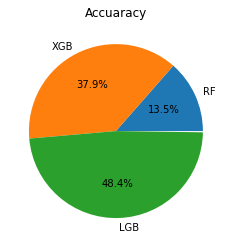

In [25]:
lab = ['RF', 'XGB', 'LGB']
plt.pie(acc,autopct='%.1f%%',labels=lab,)
plt.title('Accuaracy')
plt.show()

C:\Users\sangk\AppData\Local\Temp/ipykernel_16768/2334403861.py:2: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(pre,autopct='%.1f%%',labels=lab,)


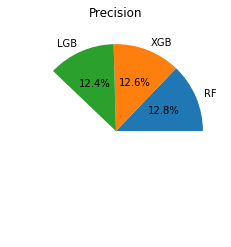

In [26]:
lab = ['RF', 'XGB', 'LGB']
plt.pie(pre,autopct='%.1f%%',labels=lab,)
plt.title('Precision')
plt.show()

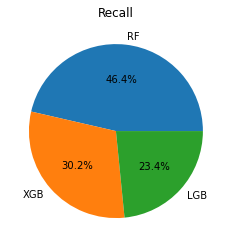

In [27]:
lab = ['RF', 'XGB', 'LGB']
plt.pie(rec,autopct='%.1f%%',labels=lab,)
plt.title('Recall')
plt.show()

C:\Users\sangk\AppData\Local\Temp/ipykernel_16768/2895246925.py:2: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(f,autopct='%.1f%%',labels=lab,)


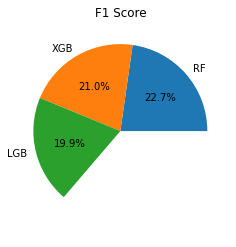

In [28]:
lab = ['RF', 'XGB', 'LGB']
plt.pie(f,autopct='%.1f%%',labels=lab,)
plt.title('F1 Score')
plt.show()

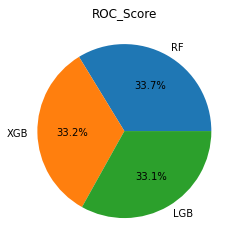

In [29]:
lab = ['RF', 'XGB', 'LGB']
plt.pie(ro,autopct='%.1f%%',labels=lab,)
plt.title('ROC_Score')
plt.show()